In [ ]:
# Develop an autoencoder to encode and decode the image. Analyze the results
# a) Develop AE for MNIST dataset
# b) Use output of AE as input to CNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Input, Dense, Dropout
from keras.models import Model

In [2]:
(X_train, _), (X_test, _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Normalize and preprocess the data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [4]:
# Flatten the images (28x28 -> 784)
X_train = X_train.reshape(len(X_train), -1)  # -1 infers the second dimension
X_test = X_test.reshape(len(X_test), -1)

In [5]:
print(X_train.shape)  # (60000, 784)
print(X_test.shape)   # (10000, 784)

(60000, 784)
(10000, 784)


In [6]:
# Define the autoencoder architecture
input_img = Input(shape=(784,))
encoded = Dense(units=128, activation='relu')(input_img)
encoded = Dropout(0.3)(encoded)  # Increased dropout rate
encoded = Dense(units=32, activation='relu')(encoded)  # Reduced encoding dimension
decoded = Dense(units=784, activation='sigmoid')(encoded)

In [7]:
# Build the autoencoder and encoder models
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

In [8]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [10]:
# Train the autoencoder
autoencoder.fit(X_train, X_train,
                epochs=5,  # Increased epochs to improve learning
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.0098 - loss: 0.1507 - val_accuracy: 0.0113 - val_loss: 0.1273
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.0113 - loss: 0.1426 - val_accuracy: 0.0117 - val_loss: 0.1205
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.0106 - loss: 0.1376 - val_accuracy: 0.0116 - val_loss: 0.1155
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.0108 - loss: 0.1339 - val_accuracy: 0.0137 - val_loss: 0.1118
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.0106 - loss: 0.1309 - val_accuracy: 0.0111 - val_loss: 0.1092


In [11]:
# Get encoded representations and reconstructed images
encoded_imgs = encoder.predict(X_test)
predicted = autoencoder.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


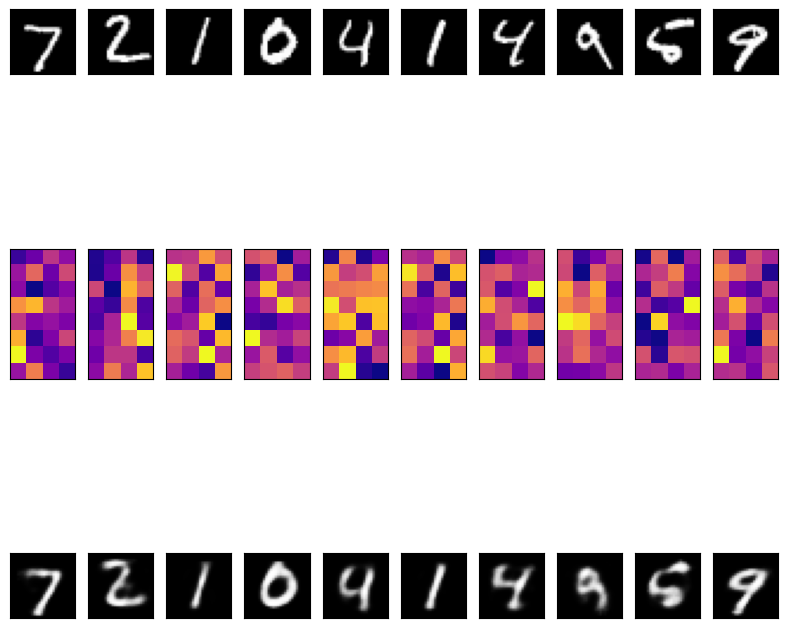

In [12]:
# Plot the original, encoded, and reconstructed images
plt.figure(figsize=(20, 10), dpi=100)
for i in range(10):
    # Display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display encoded images as 1D vectors (better for visualization)
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8, 4), cmap='plasma')  # Reshaping the 32 encoded features into 8x4 grid
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(3, 20, 2 * 20 + i + 1)
    plt.imshow(predicted[i].reshape(28, 28), cmap='gray')  # Use gray for better clarity
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()